# Testing ESS Modelling Toolkit (EMTK) 

## Lorentzian Curve / Cauchy Distribution

Generated 2000 samples using parameters [0.01111111]
Lorentzian curve maximum likelihood estimation
2000 data points
[0.0001] as initial guess (kappa)
[0.01106731]  +/- [0.00021]? solution obtained numerically
[0.01106731] solution obtained numerically
That a maximum was found is True via second derivative
[237.83355636 223.98674391 200.81801041 173.91696028 147.59576153
 124.1340339  104.25888206  87.85521351  74.46918576  63.57466425
  54.68708117  47.39937064  41.3839572   36.38251033  32.1929836
  28.65759888  25.65286366  23.08168095  20.86726283  18.9484876
  17.27637237  15.81139225  14.52143717  13.38024775  12.36621145
  11.46143058  10.65099628   9.92241935   9.26518139   8.67037849
   8.1304367    7.63888354   7.19016349   6.77948803   6.40271329
   6.05623962   5.73692878   5.44203536   5.16914963   4.91614987
   4.6811623    4.46252736   4.25877113   4.06858114   3.89078572
   3.72433632   3.56829243   3.42180855   3.28412293   3.15454788]
[223 215 211 172 151 135  83 101 

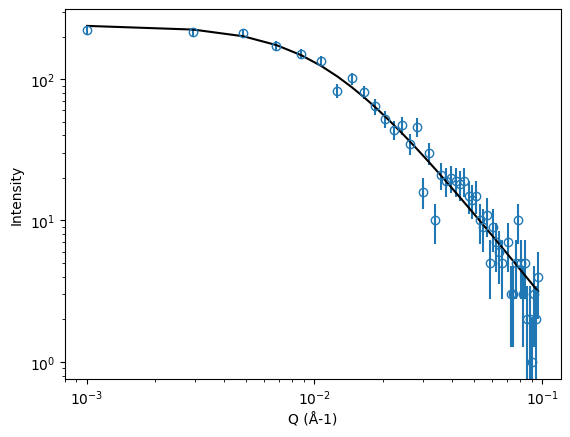

In [1]:
import emtk
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload

reload(emtk)

clength = 90.0 # correlation length in system

kappa = 1.0 / clength
curv = emtk.lorentzianCurve()
pvalues = np.array([kappa])
xrange = np.array([0.001, 0.1])
curv.generateTestSamples(pvalues, xrange, 2000)
#curv.generatebackground(xrange, ratio=0.1) # method is resistant to a 10% background, which is pretty big
curv.mle()
#curv.report()
#curv.mleAnalytic()
curv.report()
curv.plotFit(logarithmic=True)
#a2 = curv.adtest()
#print("Anderson Darling test statistic:", a2)
#ks = curv.kstest()
#print("Kolmogorov Smirnov test statistic:", ks)


In [74]:
reload(emtk)
curv = emtk.lorentzianCurve()
pars =  np.array([1.0/90.0])
qt = curv.Quantile(pars, 0.6)
nqt= curv.nQuantile(pars, 0.6)
print("qt :", qt)
print("nqt:", nqt)



qt : 0.0036102188470322916
nqt: [0.00361022]


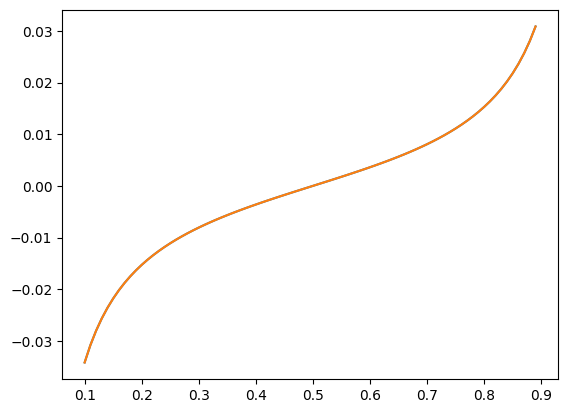

In [75]:
xs = np.arange(0.1, 0.9, 0.01)
ys = curv.Quantile(pars, xs)
nys= curv.nQuantile(pars, xs)
fx,ax = plt.subplots()
ax.plot(xs, ys)
ax.plot(xs, nys)

In [76]:
curv.Quantile(pars, 0.8)

0.015293132449679708

In [77]:
curv.nQuantile(pars, 0.8)

array([0.01529313])

In [78]:
curv.cdf(pars, curv.Quantile(pars, 0.4))

0.4

In [79]:
curv.cdf(pars, curv.nQuantile(pars, 0.4))

array([0.4])

Generated 50 samples using parameters [0.01428571]
[0.01267558] [[0.00027556]]
[0.01244007] [0.00233587]


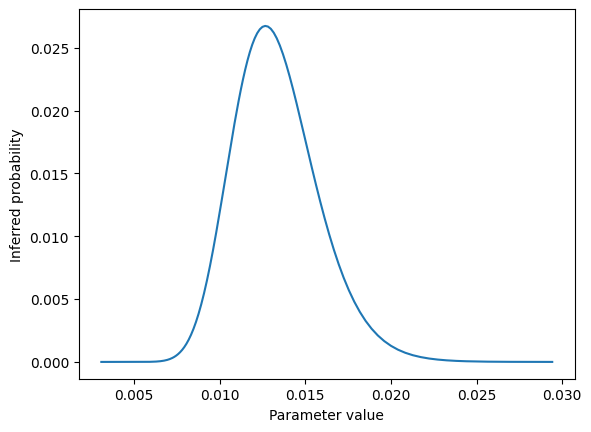

In [121]:
# Bayesian Inference

import emtk
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload

reload(emtk)

clength = 70.0 # correlation length in system

kappa = 1.0 / clength
curvMLE = emtk.lorentzianCurve()
curvBayes=emtk.lorentzianCurve()
pvalues = np.array([kappa])
xrange = np.array([0.001, 0.1])
curvMLE.generateTestSamples(pvalues, xrange, 50)
#curvMLE.generatebackground(xrange, ratio=0.1)
curvBayes.data = curvMLE.data
curvBayes.infer(plot=True)
curvMLE.mle()
print(curvMLE.estimates, curvMLE.variances)
print(curvBayes.estimates, curvBayes.variances)

[4.76773774 4.58006189 4.2558332  3.85141335 3.42046811 3.00201387
 2.6184785  2.27929583 1.98569431 1.73457    1.52100346 1.33967622
 1.18556919 1.0542476  0.94192982 0.84545431 0.76220604 0.69003313
 0.62716776 0.57215668 0.52380272 0.48111671 0.44327829 0.40960441
 0.3795239  0.35255713 0.32829956 0.30640851 0.28659252 0.26860264
 0.25222538 0.23727698 0.22359865 0.21105268 0.19951926 0.18889377
 0.17908459 0.1700112  0.16160266 0.15379629 0.14653651 0.13977398
 0.13346473 0.1275695  0.12205315 0.11688416 0.1120342  0.10747775
 0.10319176 0.09915538]
[4 6 2 5 2 2 5 1 4 2 2 1 0 1 0 0 4 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


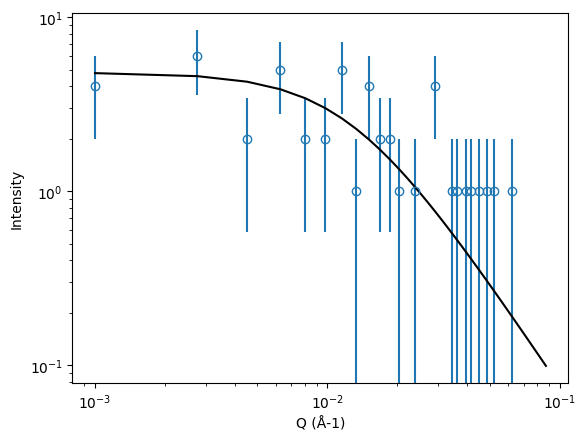

[4.84851457 4.65070719 4.31036291 3.88828751 3.4414894  3.01053618
 2.61802545 2.27286463 1.97556152 1.7223484  1.50778237 1.32616428
 1.17221101 1.04131012 0.929563   0.83373243 0.75115539 0.67965026
 0.61743139 0.5630355  0.51526037 0.4731149  0.4357788  0.40257025
 0.37291997 0.34635056 0.32245984 0.30090751 0.28140439 0.26370369
 0.24759395 0.23289327 0.21944457 0.20711172 0.1957763  0.18533502
 0.17569739 0.16678399 0.15852482 0.15085808 0.14372898 0.1370889
 0.1308945  0.12510713 0.11969219 0.11461864 0.10985859 0.10538694
 0.10118099 0.09722026]
[4 6 2 5 2 2 5 1 4 2 2 1 0 1 0 0 4 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


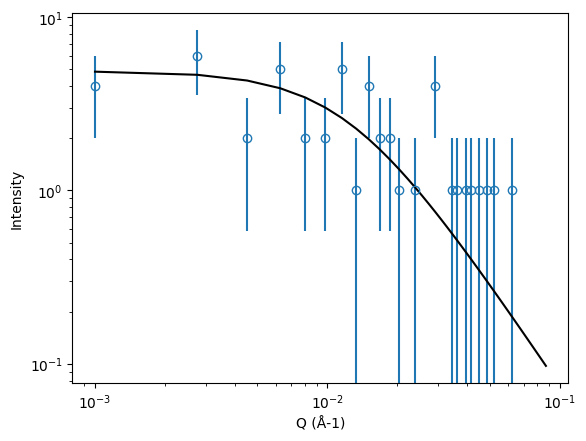

In [122]:
curvMLE.plotFit(logarithmic=True)
curvBayes.plotFit(logarithmic=True)

# Lorentzian-Squared (Not ready yet)

Generated 2000 samples using parameters [0.01111111 0.1       ]


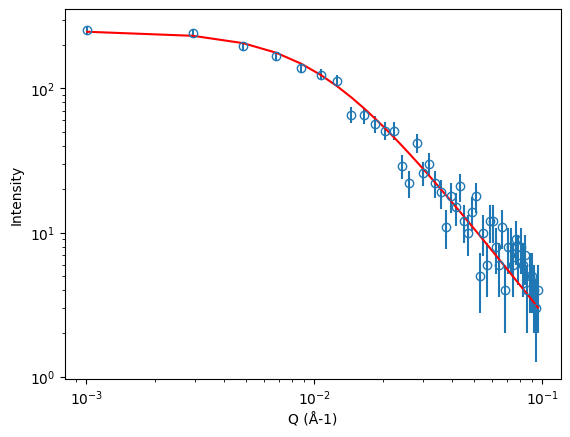

In [3]:
# At present, this is NOT working correctly and needs more development
# It is not clear why this curve shape does not work.
# Suspicion: that the Aharony-Pytte function needs to be replaced
# with an alternative disordered system model.

reload(emtk)
curv = emtk.lorentzianSquaredCurve()
kappa = 1.0 / 90.0
ss = 0.1
pvalues = np.array([kappa, ss])
xrange = np.array([0.001, 0.1])
curv.generateTestSamples(pvalues, xrange, 2000)
curv.guesses = pvalues
#curv.mle()
#curv.report()
curv.plotFit(logarithmic=True)

Lorentzian Squared maximum likelihood estimation
2000 data points
[0.01111111 0.1       ] as initial guesses (kappa, S)
[2.71054533e-02 7.39825635e+01] solution obtained numerically
R = 36.89294502448791
That a maximum was found is True via second derivative


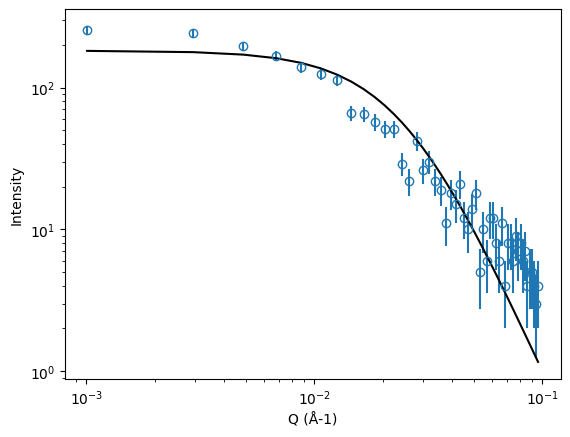

In [4]:
curv.mle()
curv.report()
curv.plotFit()

In [5]:
curv.infer()

AttributeError: 'lorentzianSquaredCurve' object has no attribute 'infer'

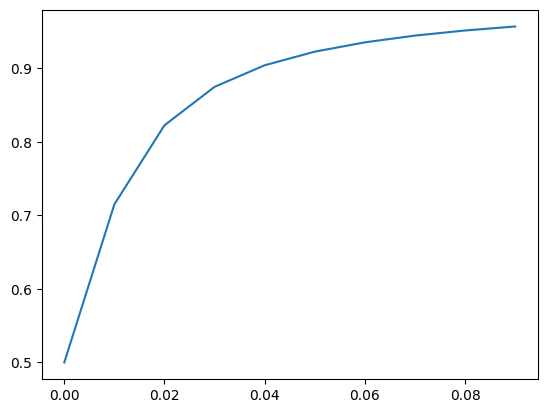

In [3]:
pars =  np.array([1.0/80.0, 0.1])
xs = np.arange(0.0, 0.1, 0.01)
ys = curv.cdf(pars, xs)
fx,ax = plt.subplots()
ax.plot(xs, ys)

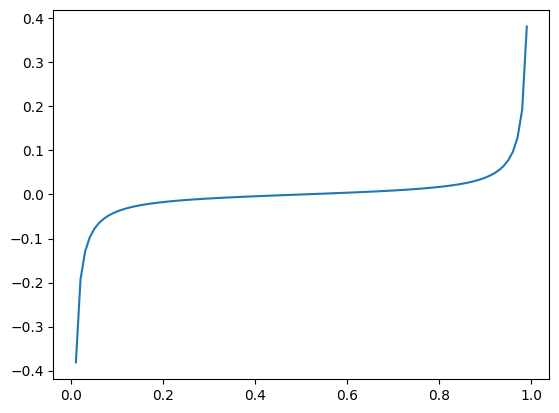

In [5]:
pars =  np.array([1.0/80.0, 0.1])
xs = np.arange(0.01, 1.0, 0.01)
ys = curv.Quantile(pars, xs)
fx,ax = plt.subplots()
ax.plot(xs, ys)

## Hard Spheres

Generated 4000 samples using parameters [75.]
Hard sphere model maximum likelihood estimation
4000 data points
[80.] as initial guesses (R, Angstroms)
[74.84127714] solution obtained numerically
The second derivative indicates that this is a maximum


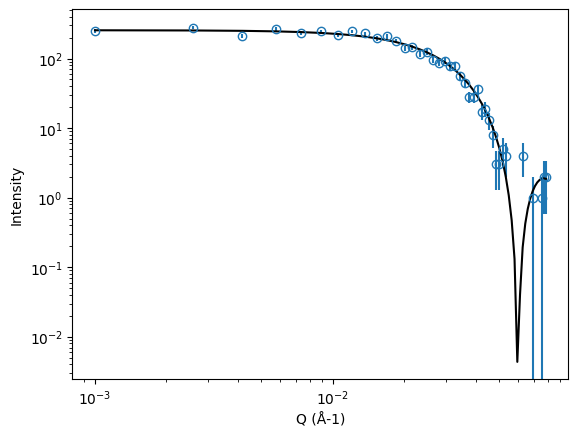

In [6]:
reload(emtk)
curv = emtk.hardSphereCurve()
pvalues = np.array([75.0])
xrange = np.array([0.001, 0.1])
curv.generateTestSamples(pvalues, xrange, 4000)
curv.guesses = np.array([80.0])
curv.mle()
curv.report()
curv.plotFit(logarithmic=True)

Adding flat background of 400.0 points
Hard sphere model maximum likelihood estimation
4400 data points
[80.] as initial guesses (R, Angstroms)
[80.03241] solution obtained numerically
The second derivative indicates that this is not a maximum


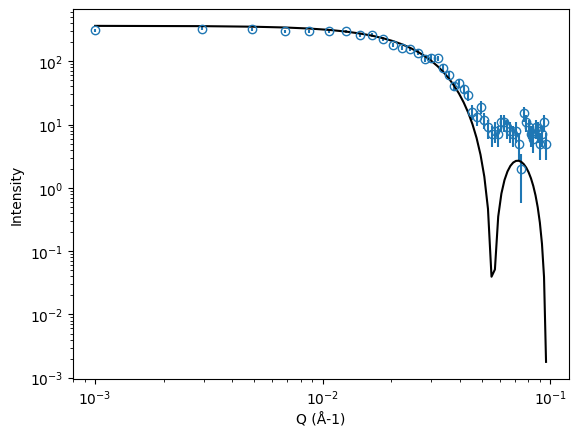

In [7]:
# It is quite tolerant of backgrounds here as well
curv.generatebackground(xrange, ratio=0.1)
curv.mle()
curv.report()
curv.plotFit(logarithmic=True)

# Porod Scattering

Generated 6000 samples using parameters [4.e+00 1.e-03]
Calculating best minimal value for power law fit
Generalised Porod curve maximum likelihood estimation
6000 data points
[3.6   0.005] as initial guesses (z, qmin)
[4.04323553e+00 1.19224147e-03] solution obtained analytically


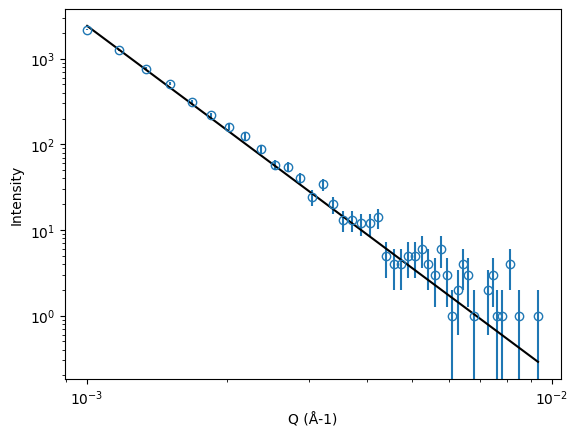

In [9]:
reload(emtk)
curv = emtk.porodCurve()
pvalues = np.array([4.0, 0.001])
xrange = np.array([0.001, 0.01])
curv.generateTestSamples(pvalues, xrange, 6000)
curv.guesses = np.array([3.6, 0.005])
curv.mle()
curv.report()
curv.plotFit(logarithmic=True)

Adding flat background of 6.0 points
Calculating best minimal value for power law fit
Generalised Porod curve maximum likelihood estimation
6006 data points
[3.6   0.005] as initial guesses (z, qmin)
[4.00962817e+00 1.13120372e-03] solution obtained analytically


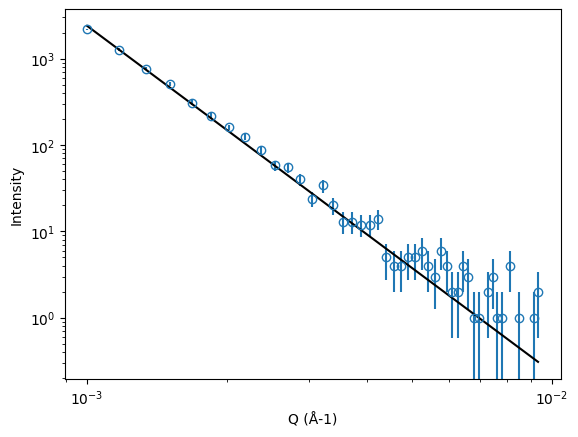

In [10]:
curv.generatebackground(xrange, ratio=1.0E-03)
curv.mle()
curv.report()
curv.plotFit(logarithmic=True)

## What does it do with multi-modal data?  Is it stable?  Does it hit somewhere in the middle?

Generated 2000 samples using parameters [0.02]
Generated 2000 samples using parameters [0.0025]
Lorentzian curve maximum likelihood estimation
4000 data points
[0.0001] as initial guess (kappa)
[0.00799257]  +/- [0.00013258]? solution obtained numerically
[0.00799257] solution obtained numerically
That a maximum was found is True via second derivative


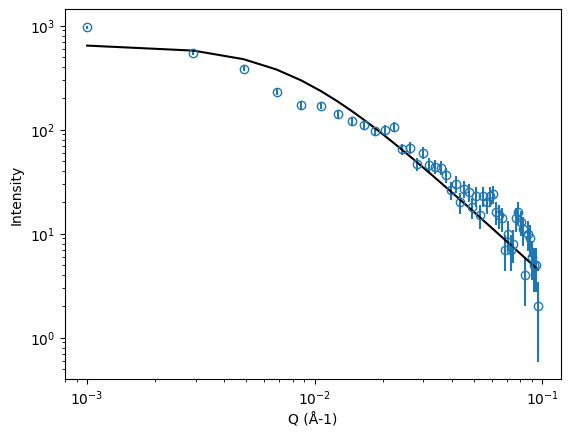

Correlation length: [125.11627005]


In [11]:
import emtk
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload

reload(emtk)

npts=2000

c1 = 50.0 # correlation length in system
c2 = 400.0

kappa = 1.0 / c1
curv = emtk.lorentzianCurve()
pvalues = np.array([kappa])
xrange = np.array([0.001, 0.1])
curv.generateTestSamples(pvalues, xrange, npts)

kappa2 = 1.0 / c2
curv2 = emtk.lorentzianCurve()
pvalues = np.array([kappa2])
curv2.generateTestSamples(pvalues, xrange, npts)

curv.data = np.concatenate((curv2.data, curv.data))
np.random.shuffle(curv.data)

#curv.generatebackground(xrange, ratio=0.1) # method is resistant to a 10% background, which is pretty big
curv.mle()
#curv.report()
#curv.mleAnalytic()
curv.report()
curv.plotFit(logarithmic=True)
#a2 = curv.adtest()
#print("Anderson Darling test statistic:", a2)
#ks = curv.kstest()
#print("Kolmogorov Smirnov test statistic:", ks)
print("Correlation length:", 1.0/curv.estimates)

# Real Data

## Work in progress... 

1. Get mantid working, and grab the routines that convert TOF and angle into Q.  This has been done on all major instruments and there is no point in reinventing the wheel.

Future tasks / problems:

2. ~~SANS correction of sample can, background, and transmission - how to do for each Q point without histogramming.  The solution I'm sure is **kernel density estimation** which we discussed earlier in the project.~~  Done with KDE.
3. Interface: I need to figure out how to import and call mantid routines in any version of python without running mantid.  It is possible.  Or:
4. Turn this mle code into a mantid plugin?



In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

loqdata = h5py.File("data/SANS/LOQ/refdata/GFP_10mgml.h5", 'r+')

print(loqdata.keys())
print(type(loqdata['sasentry01']))
entry=loqdata['sasentry01']
print(list(entry))
print(list(entry['sasdata']))
dat=entry['sasdata']
daty = np.array(dat['I'])
datx = np.array(dat['Q'])

<KeysViewHDF5 ['sasentry01']>
<class 'h5py._hl.group.Group'>
['definition', 'run', 'sasdata', 'sasinstrument', 'sasprocess', 'title']
['I', 'Idev', 'Q']


The analysis in the LOQ reference data paper (Myatt et al, DOI 10.3233/BSI-170167).  They were just plotting Guinnier plots, which assumes a lorentzian curve.  

Text(0.5, 1.0, 'NOT a Lorentzian when plotted with good y-axis')

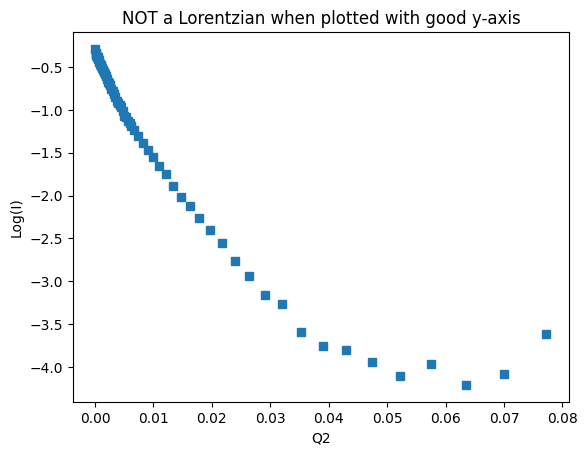

In [6]:
fig,ax=plt.subplots()
logi = np.log(daty)
q2 = datx ** 2.0
ax.plot(q2, logi,'s')
ax.set_xlabel('Q2')
ax.set_ylabel('Log(I)')
ax.set_title('NOT a Lorentzian when plotted with good y-axis')

[0.03773847] [0.00983998]


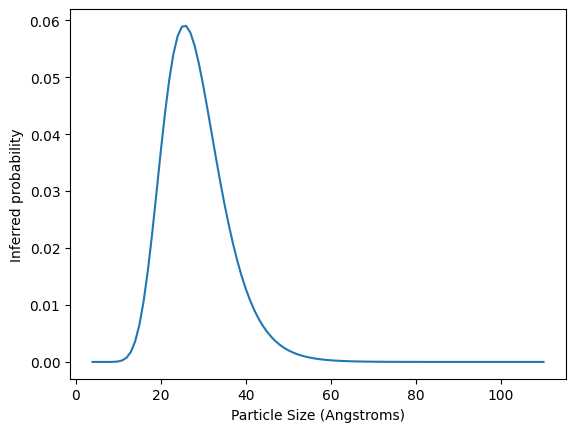

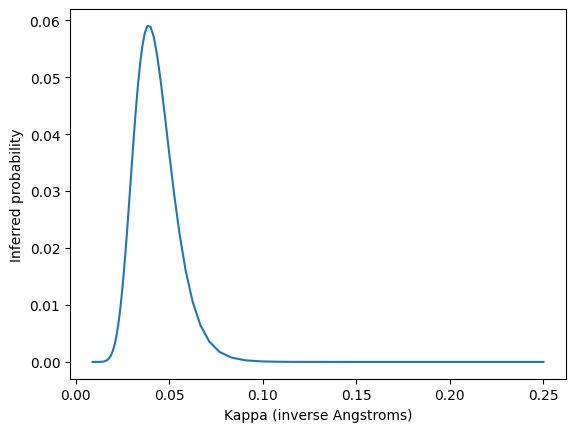

In [7]:
import bayesianInverse
import matplotlib.pyplot as plt

from importlib import reload

reload(bayesianInverse)

lor = bayesianInverse.bayesianLorentzian()

lor.datax = np.array(datx)
lor.datay = np.array(daty)
    
lor.infer(plotk=True, plotr=True)

print(lor.estimates, lor.variances)

The analysis in the LOQ reference data paper (Myatt et al, DOI 10.3233/BSI-170167), asserts that R = 20.8; the above corresponds to R=26.5, but still I'd call this a success.  They were just plotting Guinnier plots, which assumes a lorentzian curve.  However, the following shows that this is not the correct behaviour really:

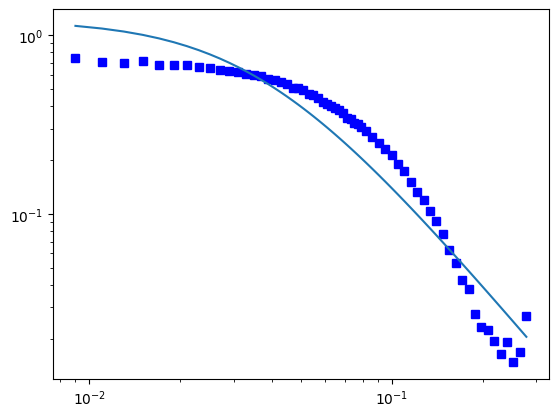

In [8]:
lor.plotfit()

What does LSE think of this?

{'amplitude': 0.15204014795845996, 'center': 0.0, 'sigma': 0.0633948065699943, 'fwhm': 0.1267896131399886, 'height': 0.7634045580564809}
R= 15.774162807735655


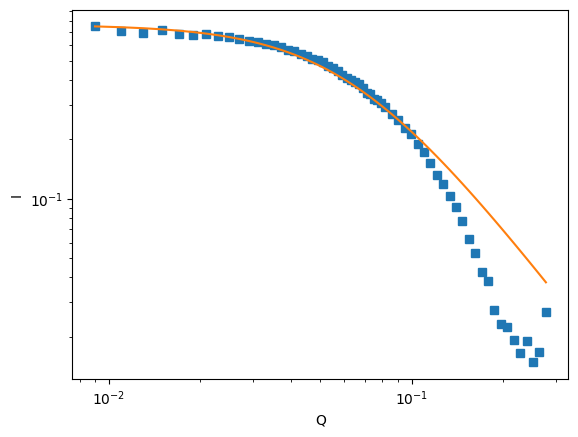

In [9]:
from lmfit import models
from scipy import stats

lse = models.LorentzianModel()

params = lse.make_params()
params['center'].value=0.0
params['center'].vary=False

#print(params)

lsefit = lse.fit(daty, params, x=datx)
print(lsefit.values)

print("R=", 1.0 / lsefit.values['sigma'])

fig,ax=plt.subplots()
ax.plot(datx, daty,'s')
ax.plot(datx, lsefit.best_fit)
ax.set_xlabel('Q')
ax.set_ylabel('I')
ax.set_title('')
ax.set_yscale('log')
ax.set_xscale('log')

The early part of the curve is lorentzian, but that corresponds to a much smaller R value of 16 Angstroms.

Text(0.5, 1.0, 'Only first half of data approaches Lorentzian')

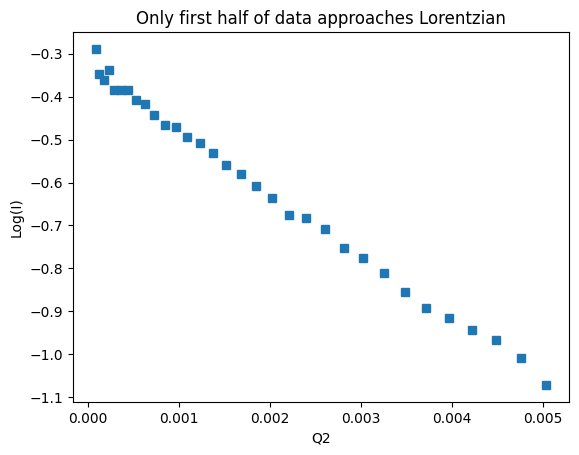

In [26]:
num2delete = 30
range1 = datx.size - num2delete
range2 = datx.size
mask = np.arange(range1, range2, 1)

clipx = np.copy(datx)
clipx=np.delete(clipx, mask)
clipy = np.copy(daty)
clipy=np.delete(clipy, mask)

fig,ax=plt.subplots()
logi = np.log(clipy)
q2 = clipx ** 2.0
ax.plot(q2, logi,'s')
ax.set_xlabel('Q2')
ax.set_ylabel('Log(I)')
ax.set_title('Only first half of data approaches Lorentzian')


[0.0306208] [0.00852061]


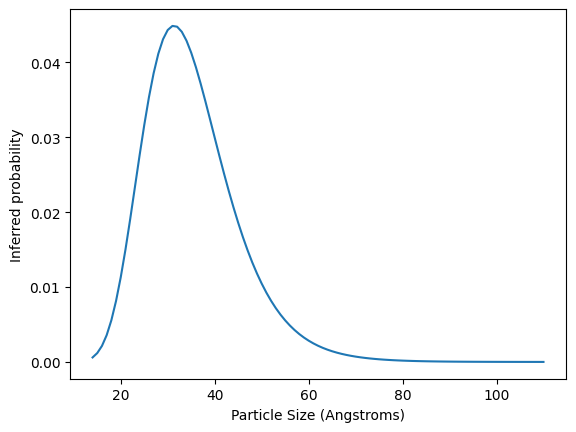

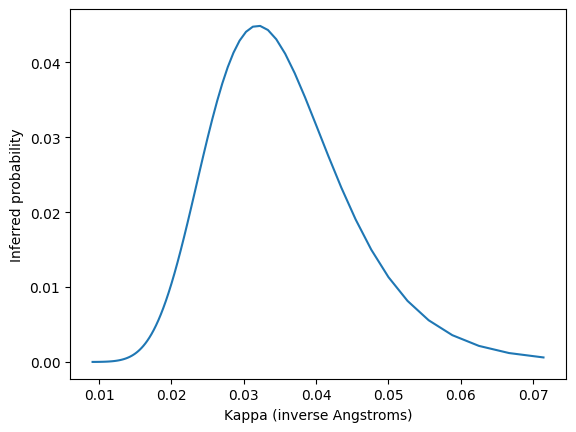

In [27]:
lor.datax = np.array(clipx)
lor.datay = np.array(clipy)
    
lor.infer(plotk=True, plotr=True)

print(lor.estimates, lor.variances)

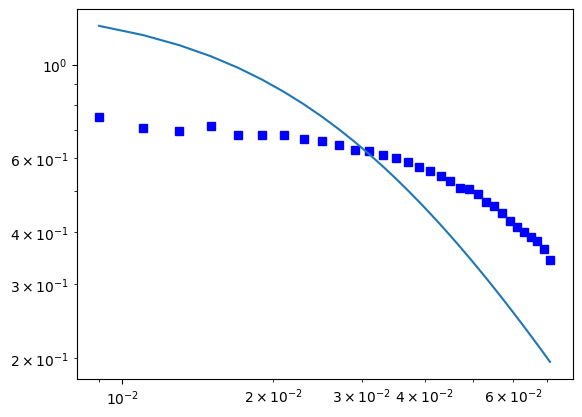

In [28]:
lor.plotfit()

In [71]:
def unbin(xx, yy, samples):
    sum = np.sum(yy)    
    scale = samples / sum
    yy = yy * scale
    
    print("Resampling histogram of size", yy.size, "with", samples, "samples")
    
    result = np.empty(0)
    
    for bin in np.arange(xx.size):
        nn = int(np.round(yy[bin]))
        chunk = np.full(nn, xx[bin])
        result = np.append(result, chunk)
    
    np.random.shuffle(result)
    
    return result
        

        
sp = unbin(clipx, clipy, 20000)


Resampling histogram of size 32 with 20000 samples


Lorentzian curve maximum likelihood estimation
19999 data points
[0.0001] as initial guess (kappa)
[0.03191863]  +/- [0.00131522]? solution obtained numerically
[0.03191863] solution obtained numerically
That a maximum was found is True via second derivative
[1218.97518911 1175.96227587 1129.23443107 1079.9997585  1029.35866903
  978.26936077  927.53180594  877.78659406  829.52435926  783.10174403
  738.76055073  696.64759867  656.8336354   619.33034203  584.1049892
  551.09265345  520.20612125  491.34372565  464.39540867  439.24730749
  415.78514195  393.89664862  373.47326968  354.41126916  336.61241572
  319.98434326  304.44067609  289.90098606  276.29063316  263.54052836
  251.58684784  240.37071992]
[845 798 786 805 769 768 768 751 743 725 708 704 688 678 664 644   0 631
 614 598 574 570 556 531 519 501 480 463 451 439 429 412]


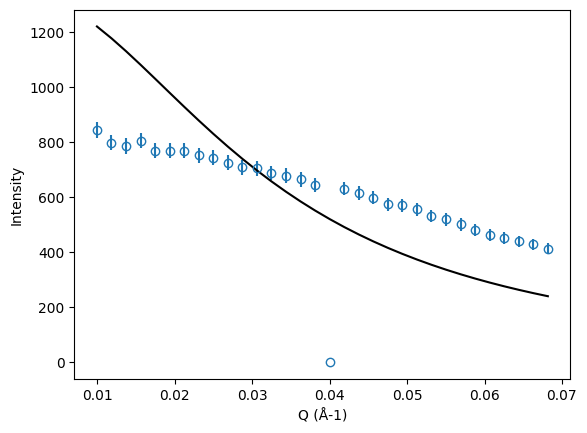

In [72]:
import emtk

from importlib import reload
reload(emtk)

curv = emtk.lorentzianCurve()
curv.data = sp
curv.setupGuesses()
curv.mle()
curv.report()
curv.plotFit(logarithmic=False, nbins=32)



{'amplitude': 0.15986149179375336, 'center': 0.0, 'sigma': 0.06836649150340146, 'fwhm': 0.13673298300680292, 'height': 0.7443046198178639}
R= 14.627048690223436


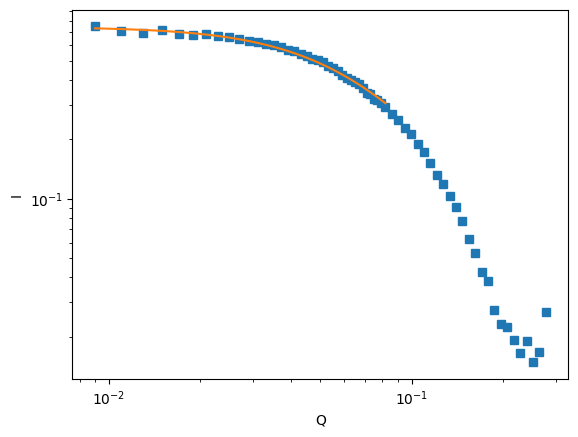

In [23]:
lse = models.LorentzianModel()

params = lse.make_params()
params['center'].value=0.0
params['center'].vary=False

#print(params)

lsefit = lse.fit(clipy, params, x=clipx)
print(lsefit.values)

print("R=", 1.0 / lsefit.values['sigma'])

fig,ax=plt.subplots()
ax.plot(datx, daty,'s')
ax.plot(clipx, lsefit.best_fit)
ax.set_xlabel('Q')
ax.set_ylabel('I')
ax.set_title('')
ax.set_yscale('log')
ax.set_xscale('log')

# Missing Features List

The following might be interesting
* pytest? --- done
* distribution & statistical testing? 
* sphinx? - like doxygen.  Read about it and rejected it

# open data catalogues
data.ill.eu - similar catalogue at ISIS
data.panasc.eu

QUENS data is almost always lorenzian 

Also check this:
https://github.com/DAaaS-reference-data
This last one might be the most useful, it looks like a clean lorentzian curve and there is also a reflectivity curve there.

# Desired outcome

Event mode
Fit to some distribution
Plot of estimated parameter vs events used, with error bar, compared to the traditional way of doing it.
Should ask Wojciech to do an analysis with which we compared

# Links
* https://confluence.esss.lu.se/display/DCC/Owncloud 
* http://project.esss.dk/owncloud/index.php/f/16885248 
* https://docs.google.com/document/d/1dOnBtLCSYZ__7IK479Qb8eYivxP-nBejNLA-WrmV_UA/edit
* marketplace.sasview.org
* https://content.iospress.com/articles/journal-of-neutron-research/jnr220002

ESS does not use mantid (thank god) 

* https://easyscience.software
* http://github.com/scipp
* https://scipp.github.io/getting-started/overview.html

